In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_fpath = "../data/IPM_user_profile.csv"
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_colwidth", 500)
df = pd.read_csv(data_fpath)
df.head()

,unit_id,q_0_age_answer,q_0_school_answer,q_0_taxes_answer,q_0_political_views_answer,q_0_consideration_answer,q_0_southern_border_answer,q_0_environment_answer,q_0_age_value,q_0_school_value,q_0_taxes_value,q_0_political_views_value,q_0_consideration_value,q_0_southern_border_value,q_0_environment_value,q_1_farmers_score,q_2_marks_score,q_3_athletics_score,overall_crt_score,q_0_time_elapsed,q_1_time_elapsed,q_2_time_elapsed,q_3_time_elapsed,q_0_accesses,q_1_accesses,q_2_accesses,q_3_accesses
0,unit_1,26-35,"Some college (some community college, associate’s degree)","30,000 to less than 40,000",Very liberal,Independent,Disagree,Agree,2.0,2.0,3.0,4.0,2.0,1.0,0.0,0,1,0,1,38.60,17.98,23.91,274.19,1,1,1,1
1,unit_3,26-35,"Postgraduate or professional degree, including master’s, doctorate, medical or law degree","50,000 to less than 75,000",Liberal,Independent,No opinion either way,Agree,2.0,5.0,5.0,3.0,2.0,2.0,0.0,1,1,1,3,33.94,51.06,301.34,82.71,1,1,1,1
2,unit_5,26-35,Four year college degree/bachelor’s degree,"50,000 to less than 75,000",Very liberal,Republican,Agree,Agree,2.0,3.0,5.0,4.0,0.0,0.0,0.0,0,0,0,0,80.59,37.46,54.41,99.68,1,1,1,1
3,unit_7,50-80,"Postgraduate or professional degree, including master’s, doctorate, medical or law degree","100,000 to less than 150,000",Very liberal,Democrat,Disagree,Agree,4.0,5.0,7.0,4.0,1.0,1.0,0.0,1,1,0,2,28.97,14.92,39.07,30.90,1,1,1,1
4,unit_9,19-25,High school graduate or GED (includes technical/vocational training that doesn’t towards college credit),"100,000 to less than 150,000",Moderate,Independent,Disagree,Agree,1.0,1.0,7.0,2.0,2.0,1.0,0.0,0,0,0,0,37.77,27.08,23.07,29.91,1,1,1,1


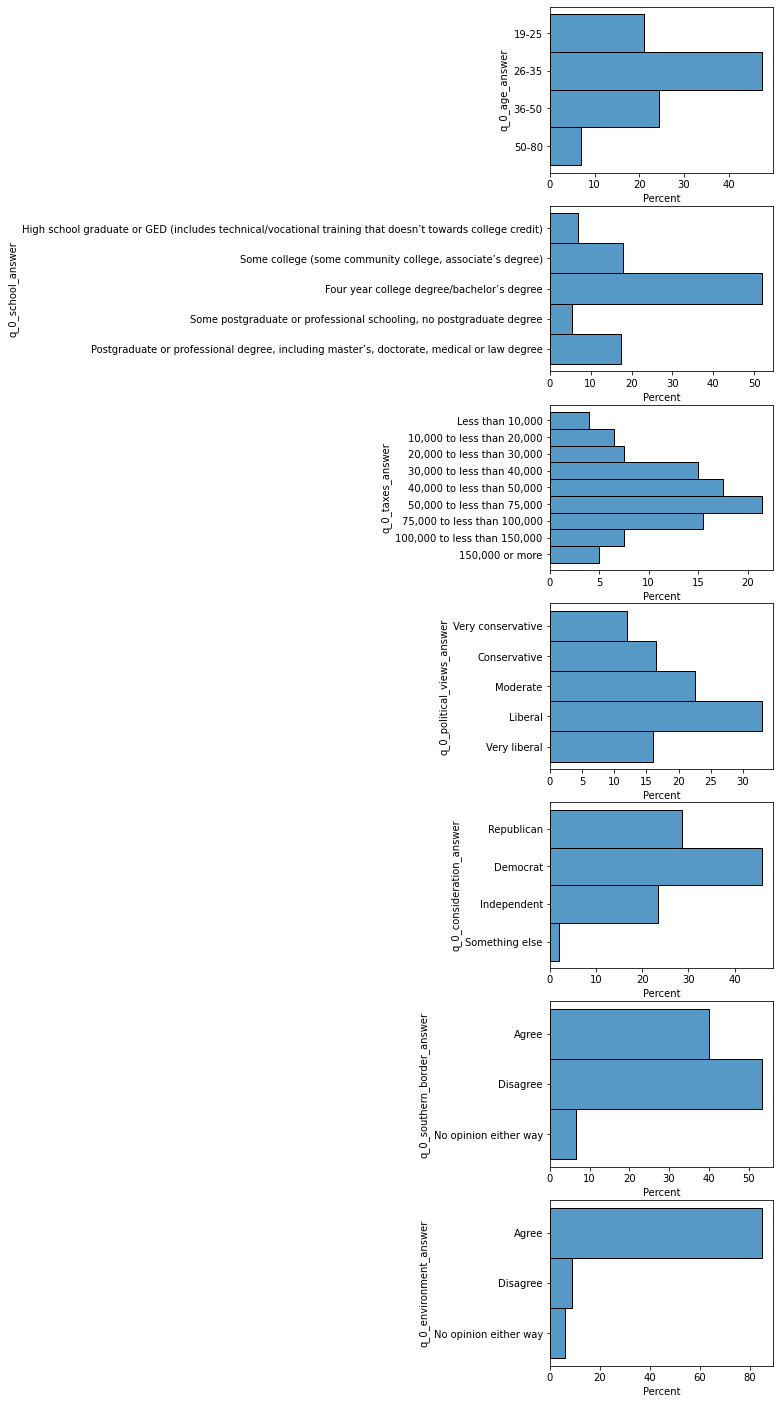

In [167]:
# q0 hist
q0_answers = [
    "q_0_age_answer", 
    "q_0_school_answer",
    "q_0_taxes_answer",
    "q_0_political_views_answer",
    "q_0_consideration_answer",
    "q_0_southern_border_answer",
    "q_0_environment_answer"
]
q0_values = [
    "q_0_age_value", 
    "q_0_school_value",
    "q_0_taxes_value",
    "q_0_political_views_value",
    "q_0_consideration_value",
    "q_0_southern_border_value",
    "q_0_environment_value"
]

fig, ax = plt.subplots(7, 1)
fig.set_size_inches(4, 25)
for i in range(7):
    df = df.sort_values(by=[q0_values[i]])
    sns.histplot(data=df, y=q0_answers[i], ax=ax[i], stat="percent")
plt.show()


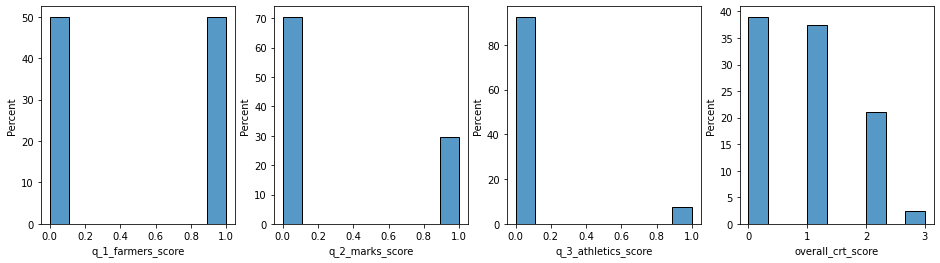

In [107]:
# ctr hist
ctr_features = [
    "q_1_farmers_score",
    "q_2_marks_score",
    "q_3_athletics_score",
    "overall_crt_score"
]

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(16, 4)
for i in range(4):
    df = df.sort_values(by=[ctr_features[i]])
    sns.histplot(data=df, x=ctr_features[i], ax=ax[i], stat="percent")
plt.show()

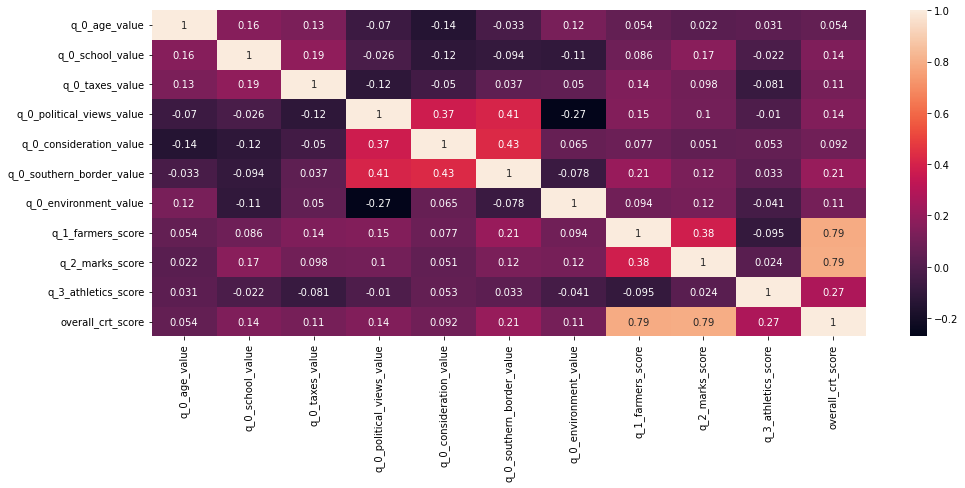

In [57]:
df_corr = df[[
    "q_0_age_value", 
    "q_0_school_value", 
    "q_0_taxes_value",
    "q_0_political_views_value",
    "q_0_consideration_value",
    "q_0_southern_border_value",
    "q_0_environment_value",
    "q_1_farmers_score",
    "q_2_marks_score",
    "q_3_athletics_score",
    "overall_crt_score",
]]

plt.figure(figsize=(16, 6))
sns.heatmap(data=df_corr.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='q_0_southern_border_answer', ylabel='q_0_consideration_answer'>

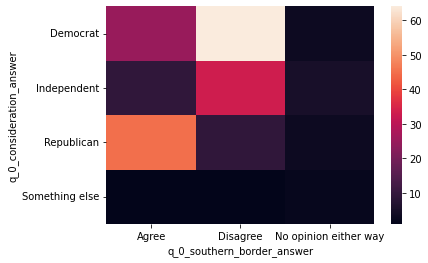

In [186]:
# cooccurence matrix of high correlation
sns.heatmap(pd.crosstab(
    df["q_0_consideration_answer"], df["q_0_southern_border_answer"]
    ))

<AxesSubplot:xlabel='q_0_political_views_answer', ylabel='q_0_consideration_answer'>

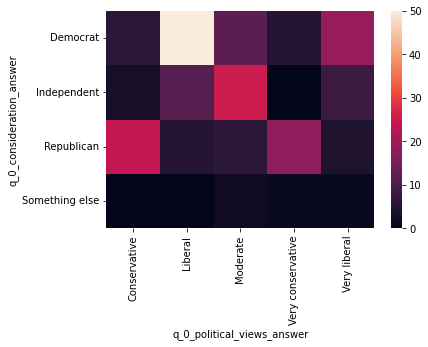

In [188]:
sns.heatmap(pd.crosstab(
    df["q_0_consideration_answer"], df["q_0_political_views_answer"]
    ))

<AxesSubplot:xlabel='q_0_political_views_answer', ylabel='q_0_southern_border_answer'>

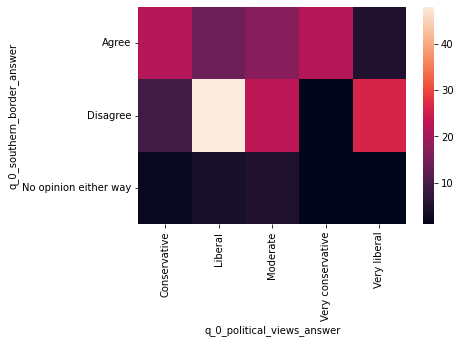

In [190]:
sns.heatmap(pd.crosstab(
    df["q_0_southern_border_answer"], df["q_0_political_views_answer"]
    ))